LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

RETRIEVE STORED VARIABLES

In [2]:
%store -r df
df = df

%store -r numerical_cols
numerical_cols = numerical_cols

%store -r categorical_cols
categorical_cols = categorical_cols

COLUMNS DESCRIPTION
|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing status|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 1-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|measures how good a country is utilizing its resources|
|Schooling|Number of years of Schooling(years)|

DESCRIPTIVE ANALYSIS

NUMERICAL DATA

In [3]:
def plot_num_dist(df, numerical_columns):
    for col in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(df[col], shade=True)
        plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
        plt.axvline(df[col].median(), color='g', linestyle='-', label='Median')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid()
        plt.show()

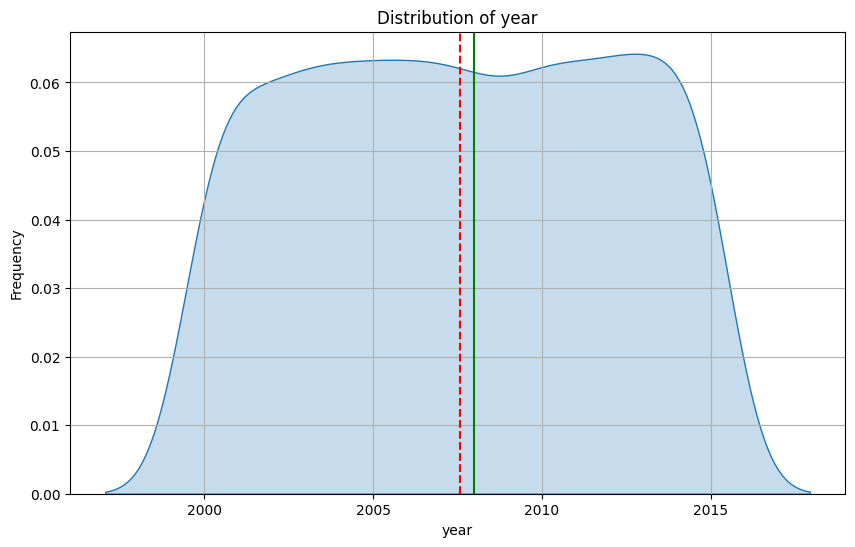

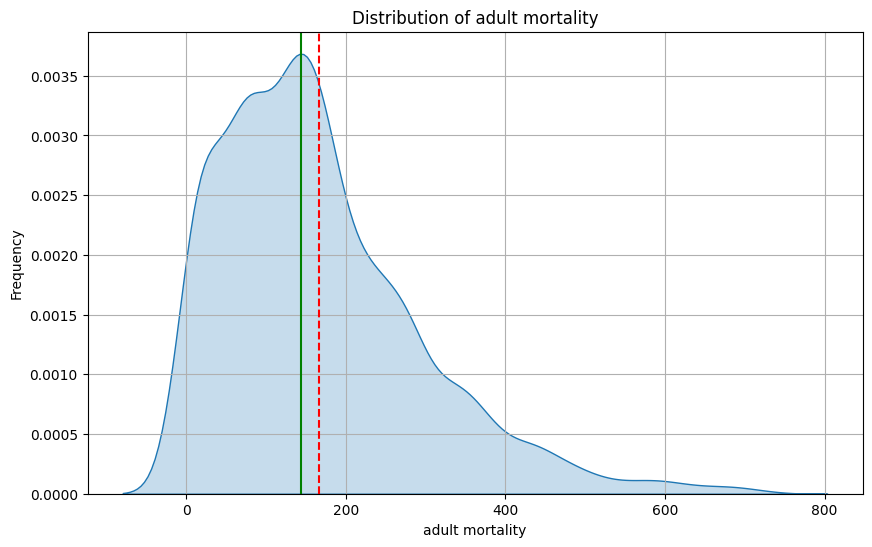

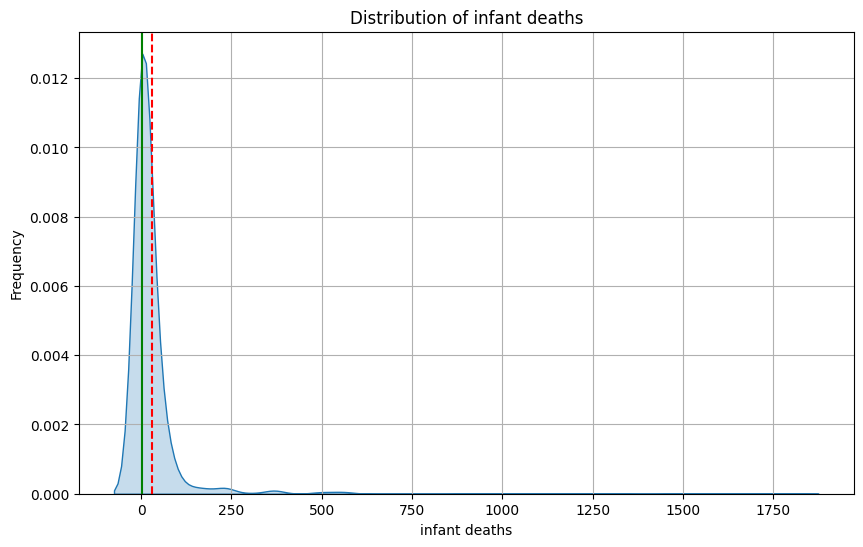

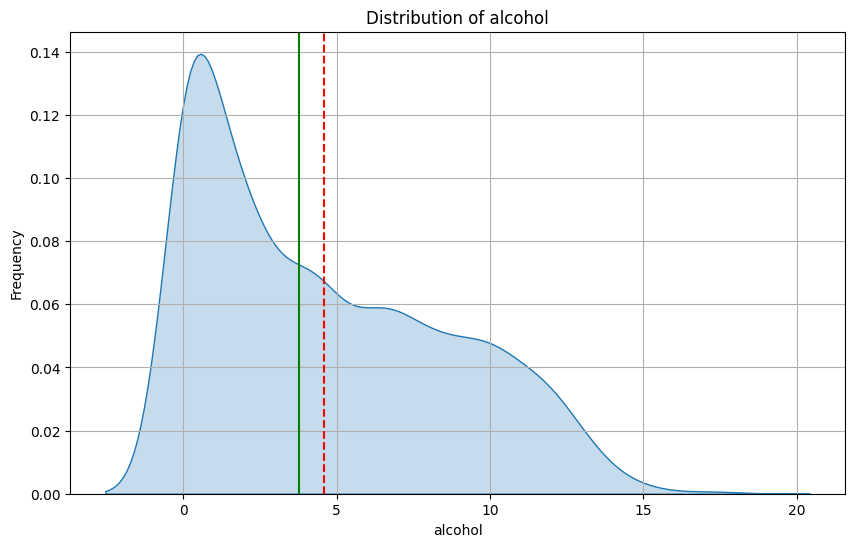

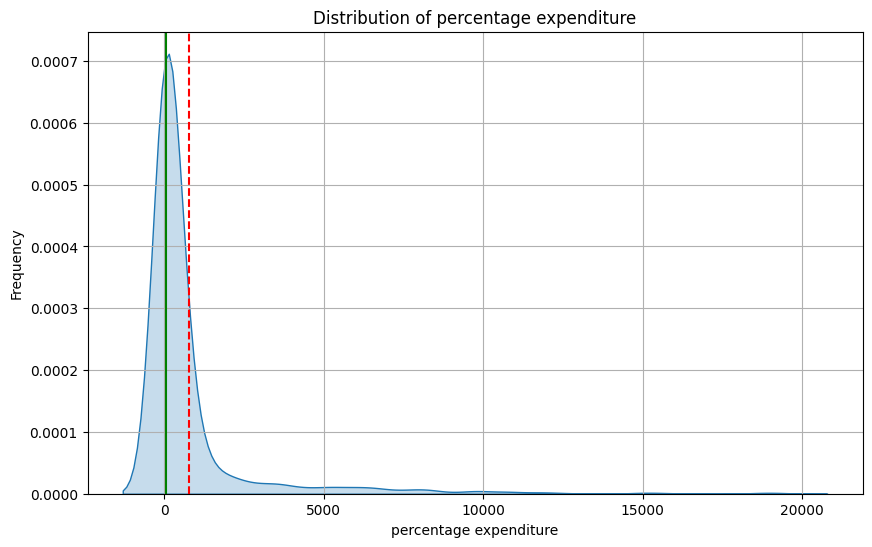

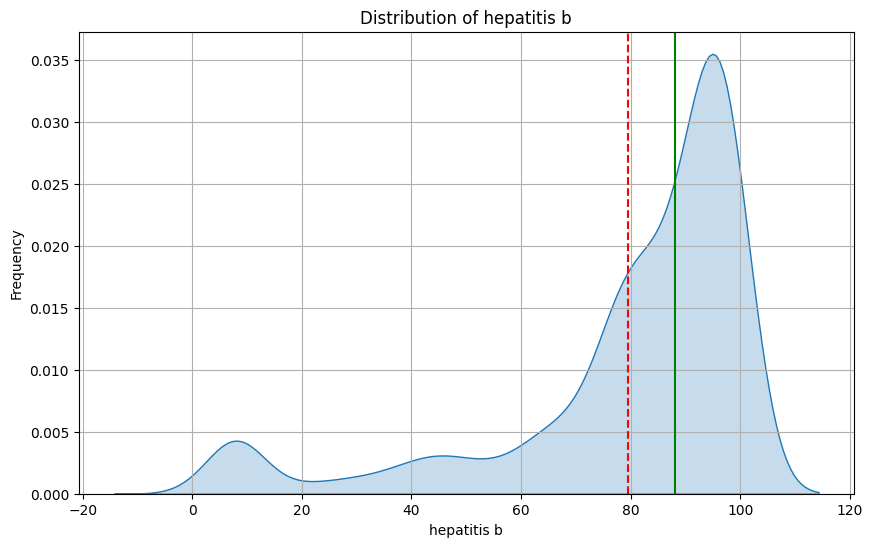

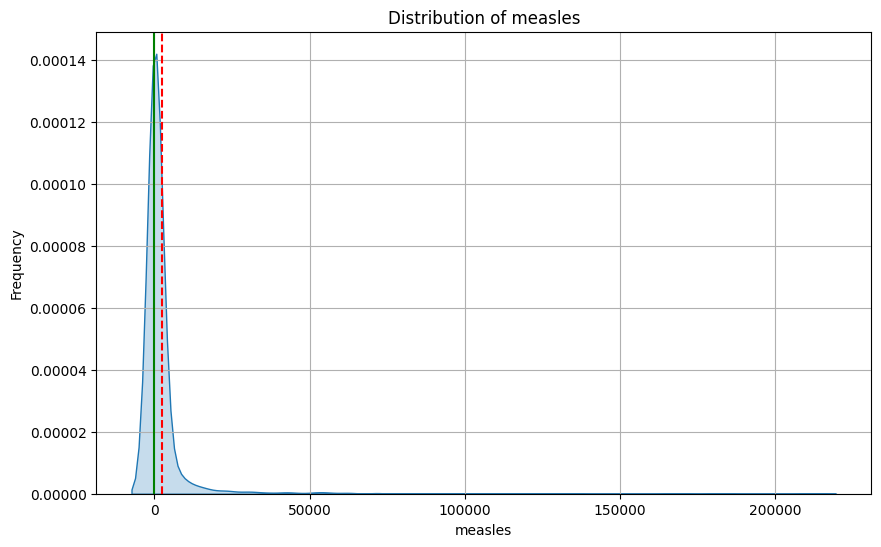

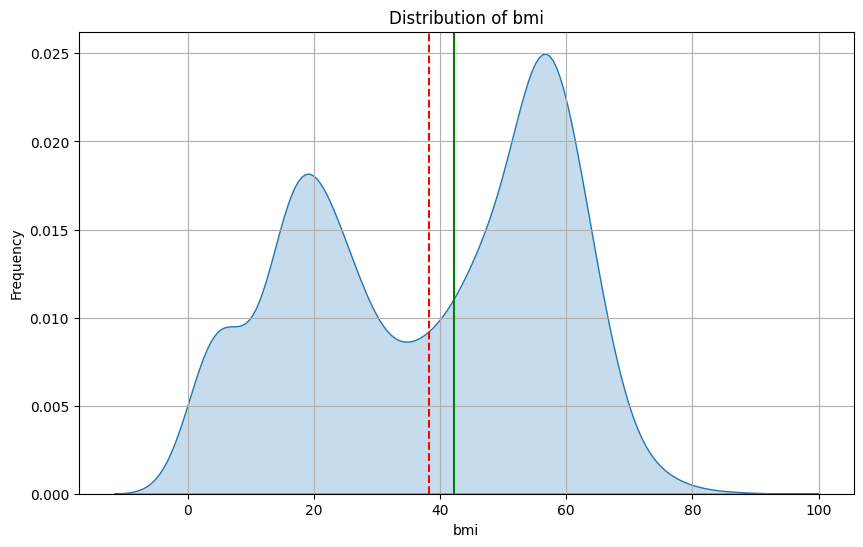

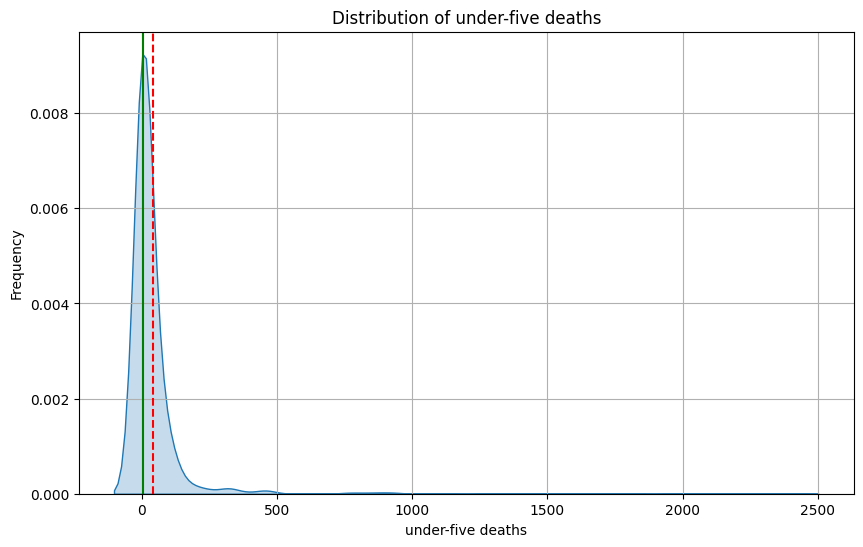

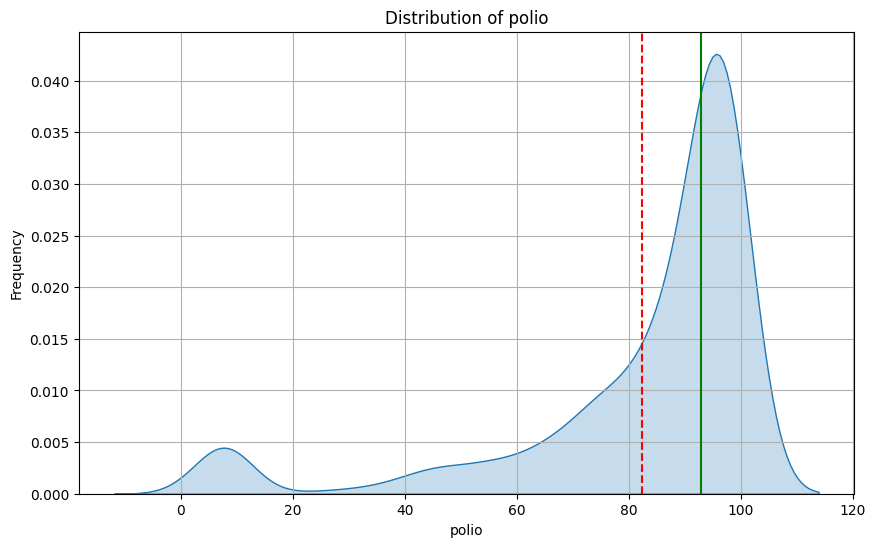

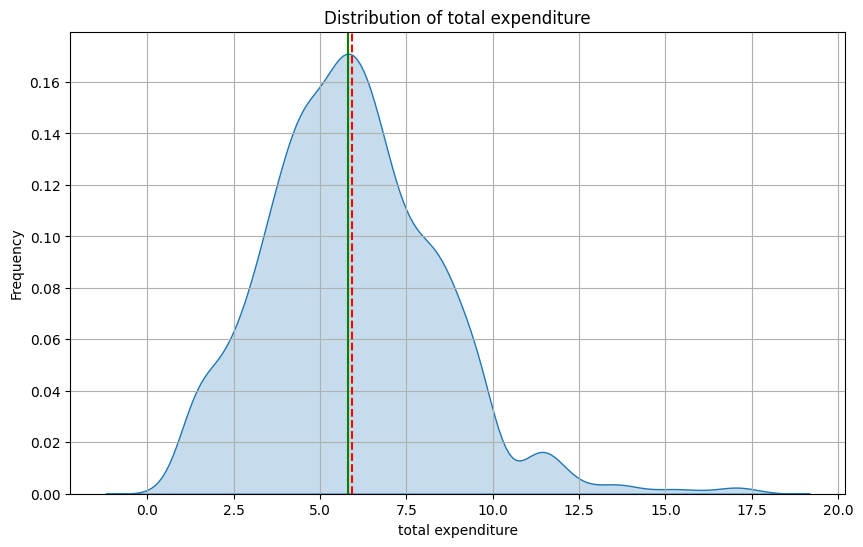

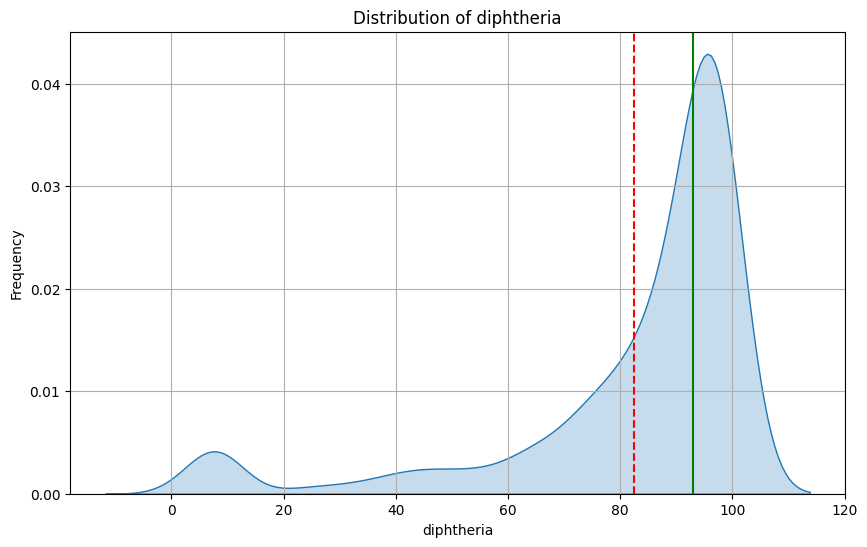

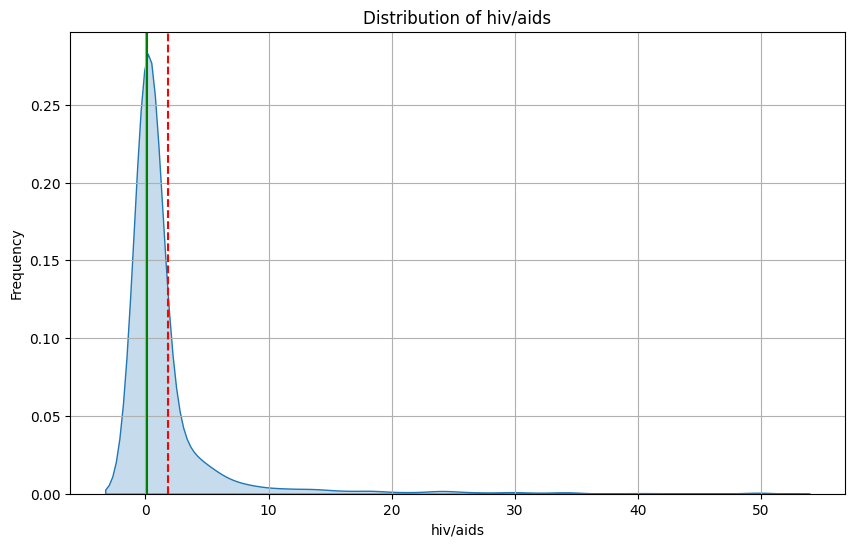

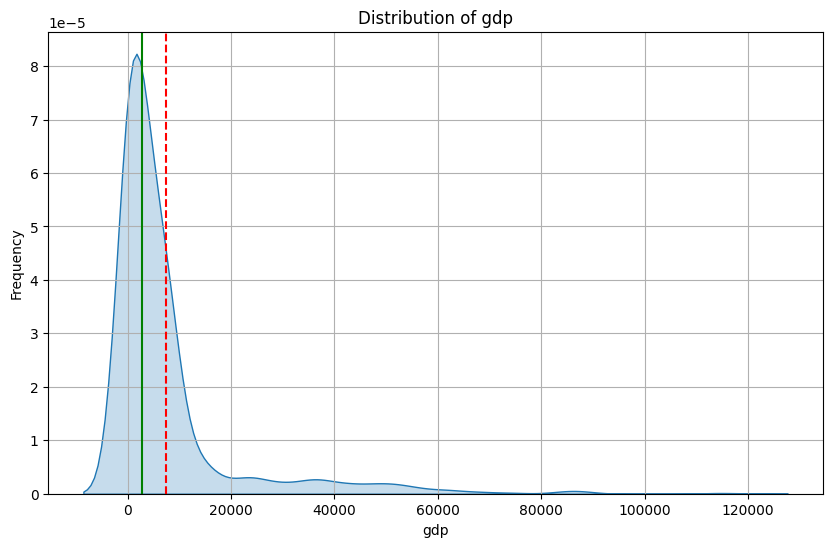

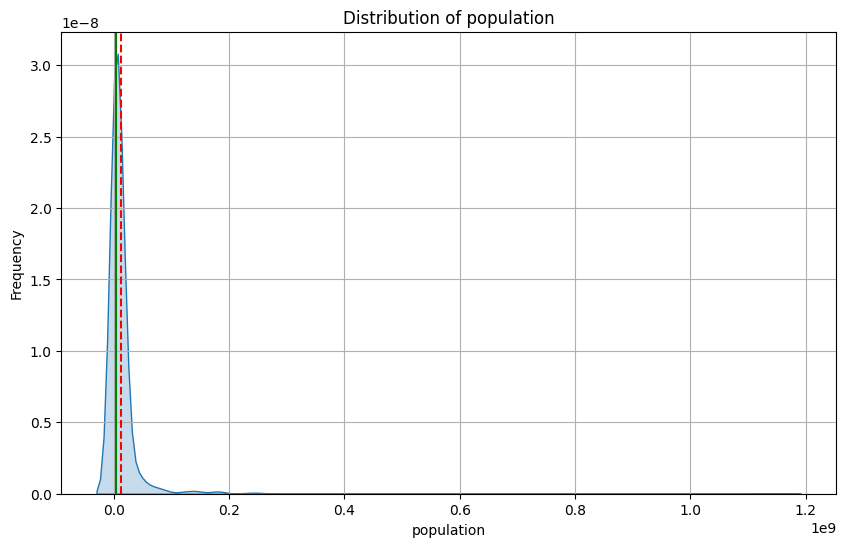

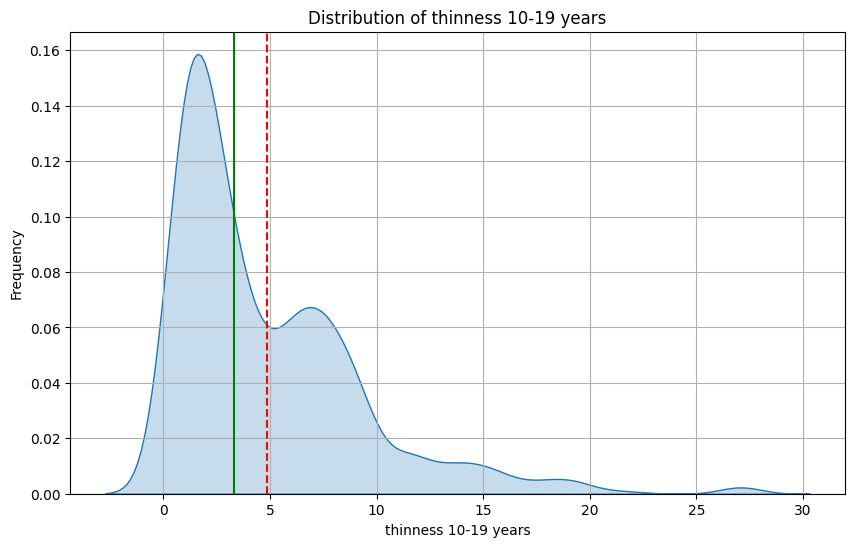

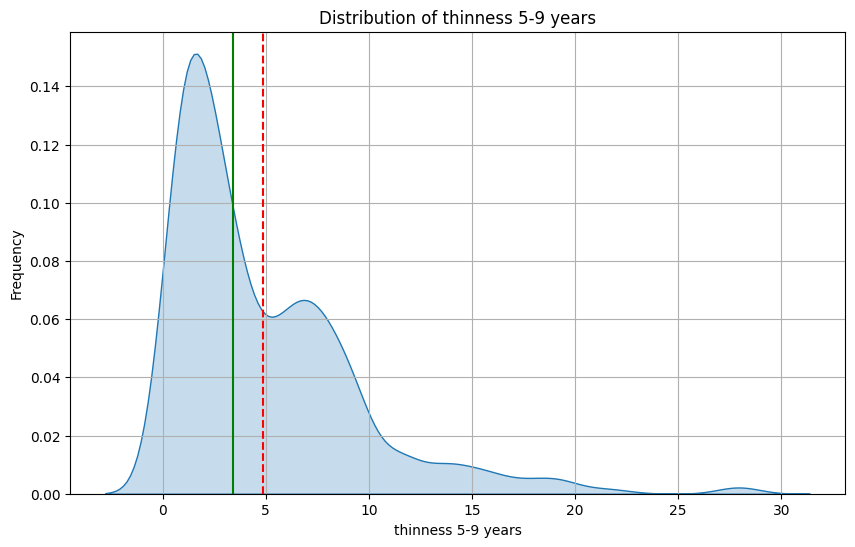

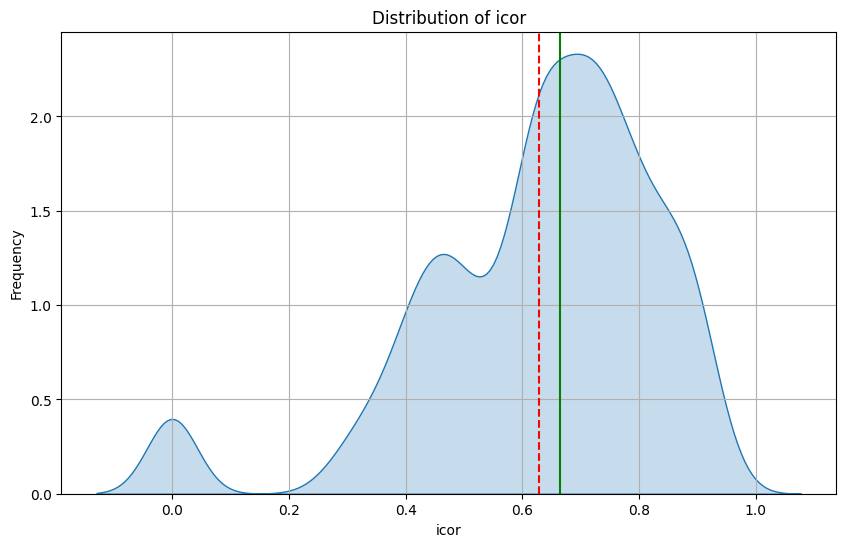

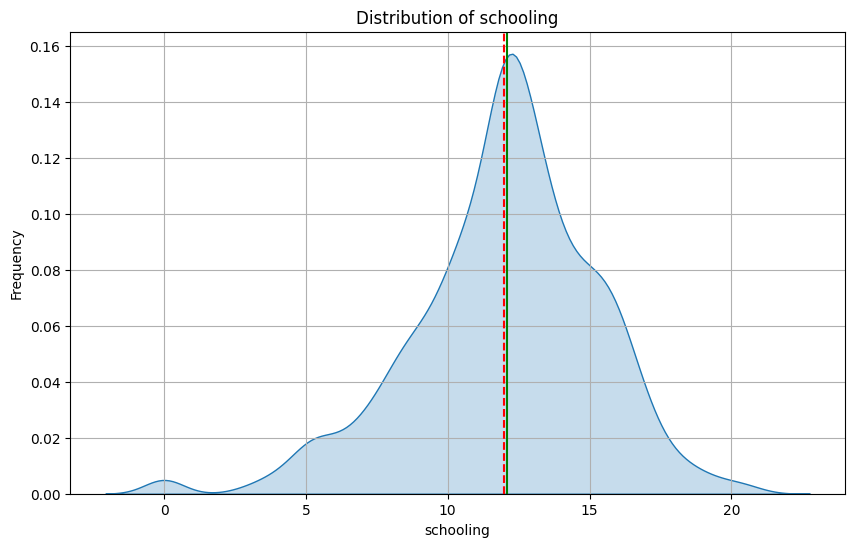

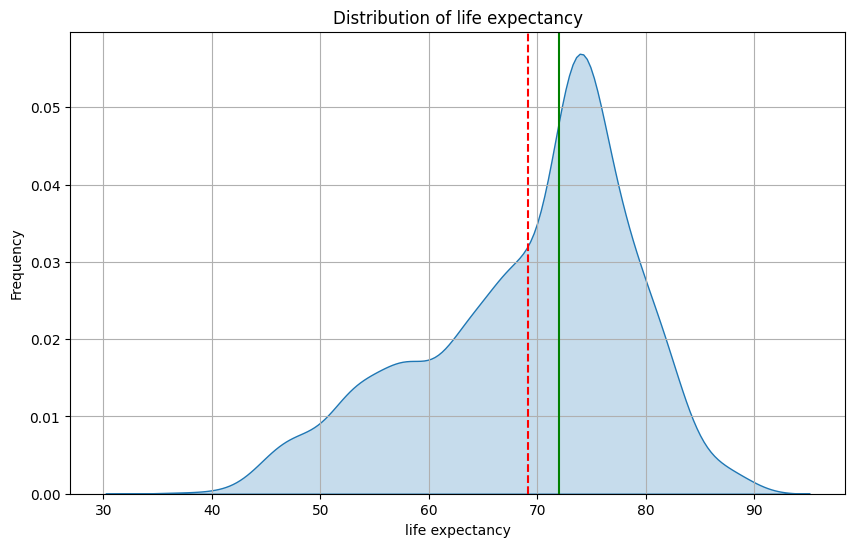

In [4]:
for col in numerical_cols:
    plot_num_dist(df, [col])

CATEGORICAL DATA

<Axes: xlabel='status', ylabel='life expectancy'>

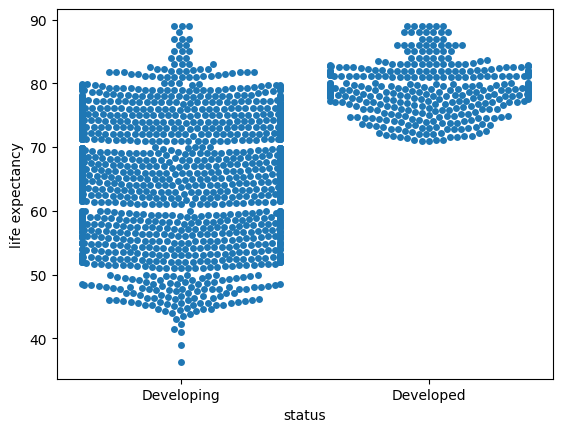

In [5]:
sns.swarmplot(data=df, x=df['status'], y=df['life expectancy'])

CORRELATION ANALYSIS

NUMERICAL DATA

Numerical columns: ['year', 'adult mortality', 'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b', 'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness 10-19 years', 'thinness 5-9 years', 'icor', 'schooling', 'life expectancy']


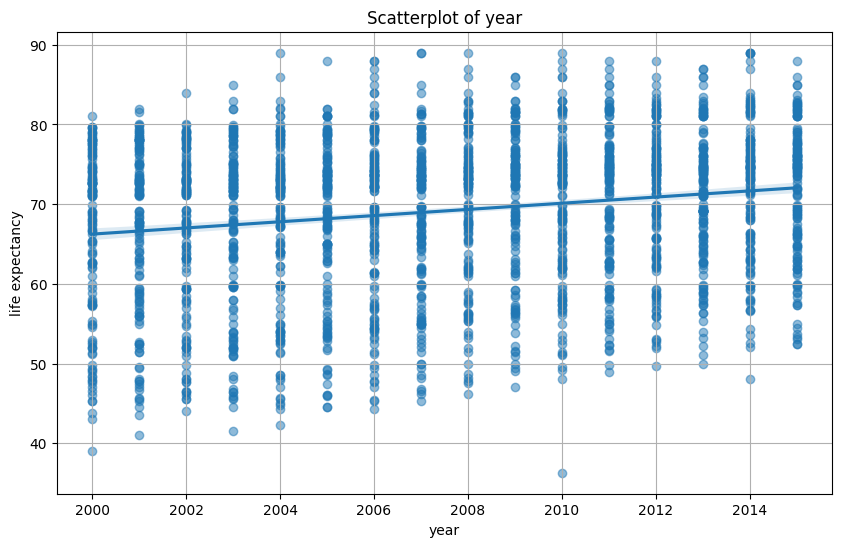

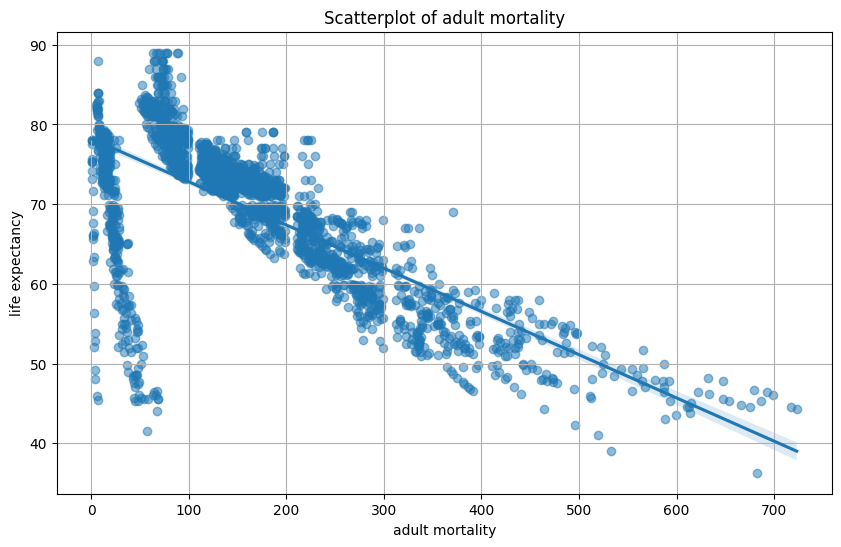

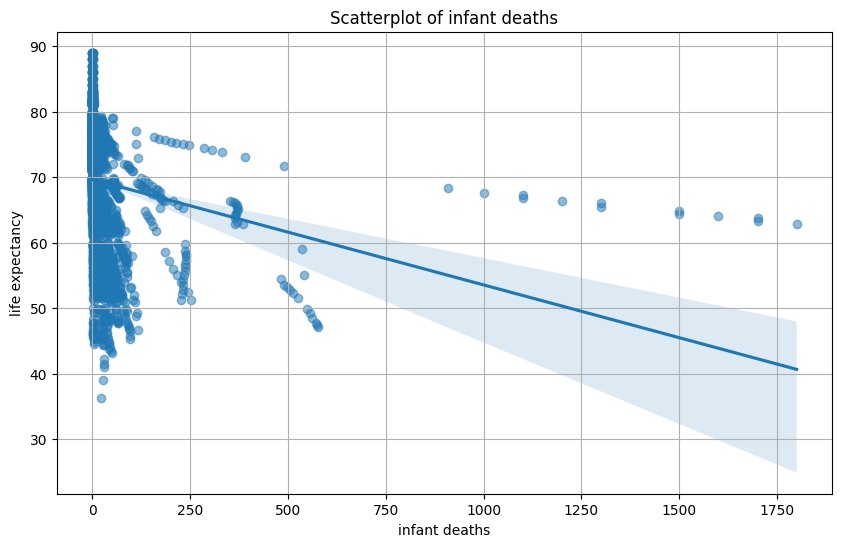

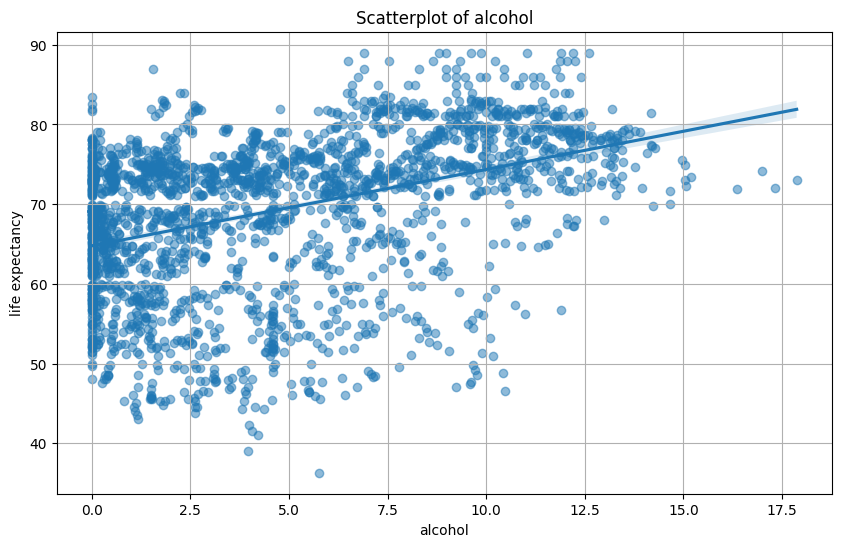

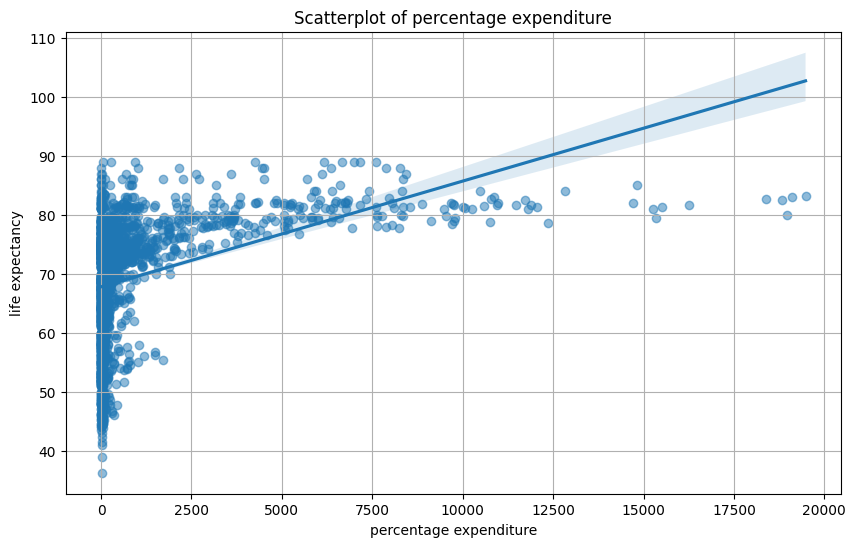

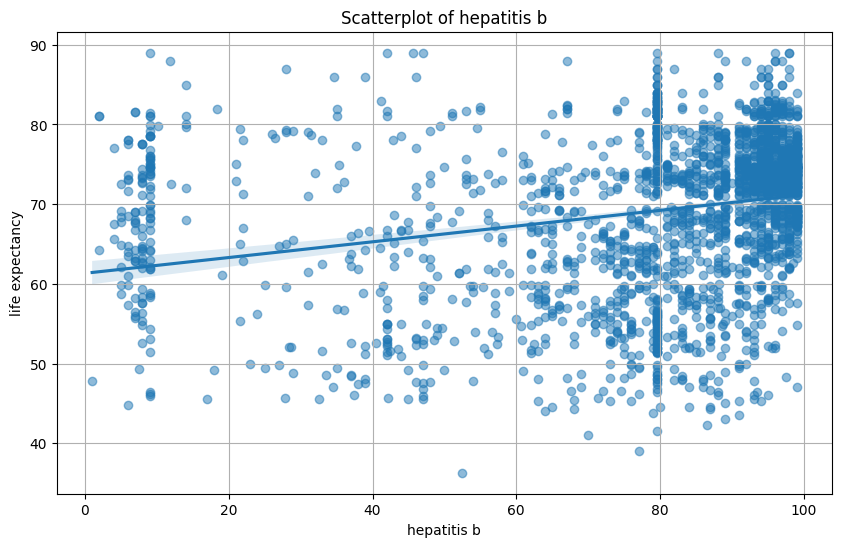

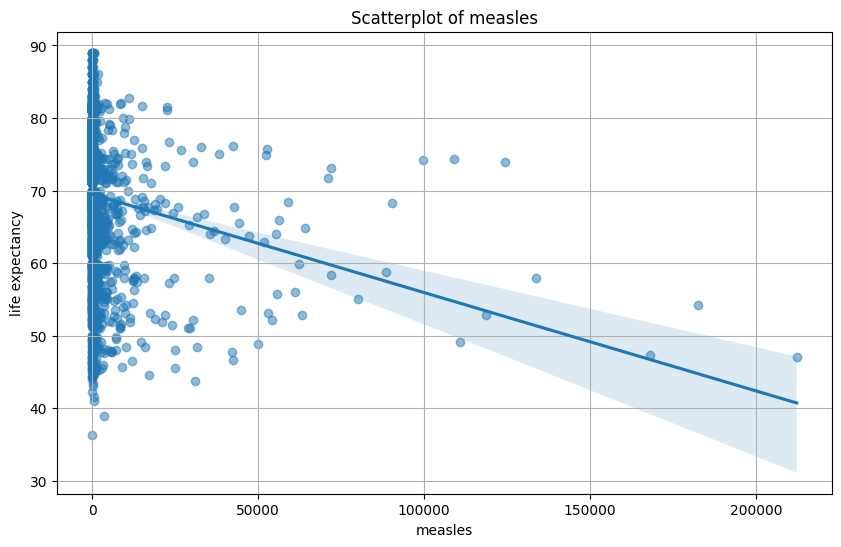

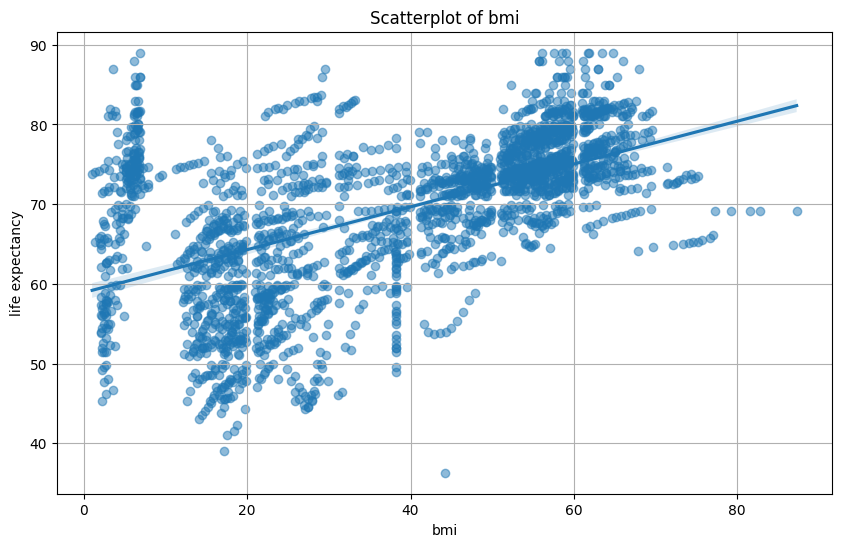

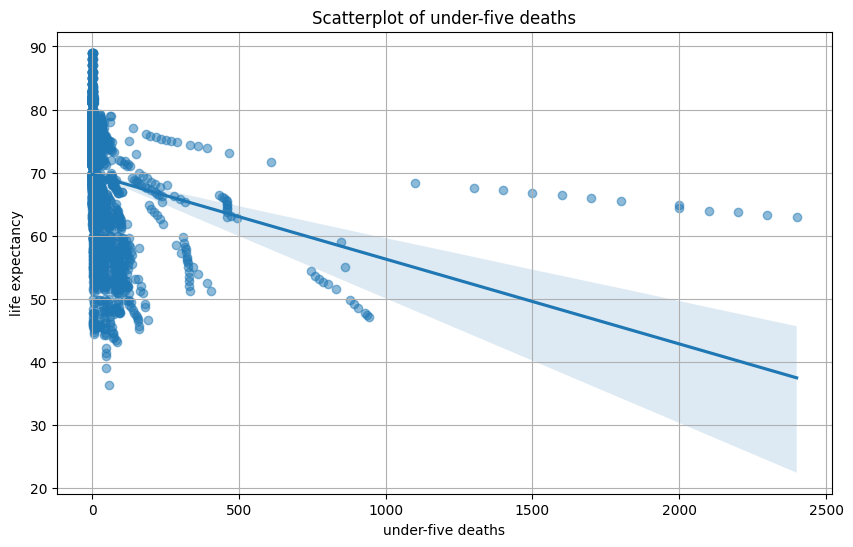

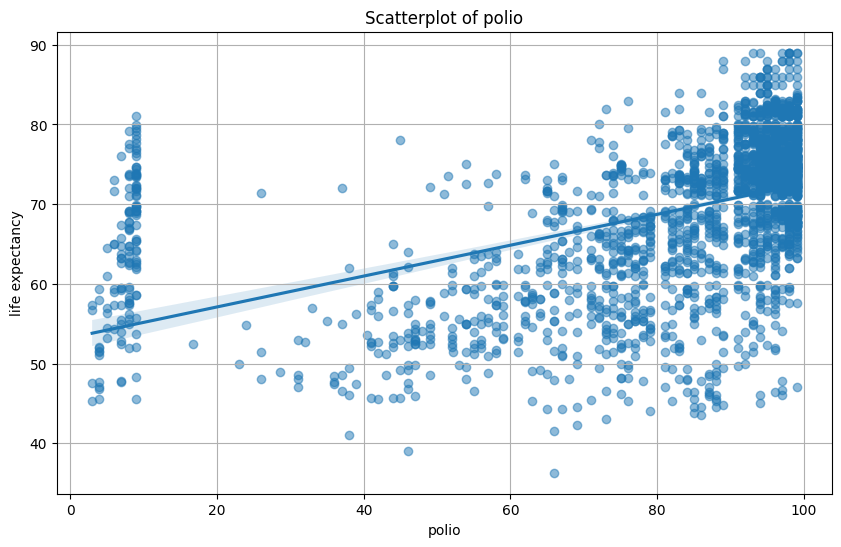

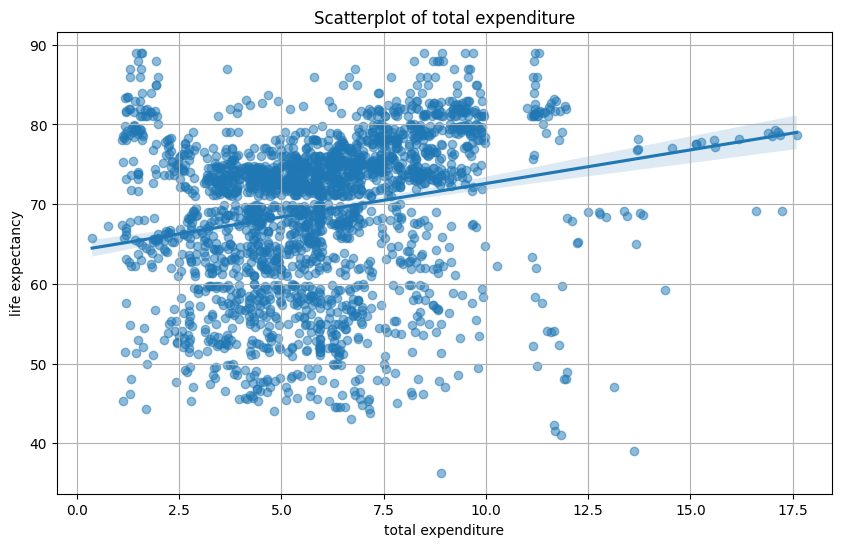

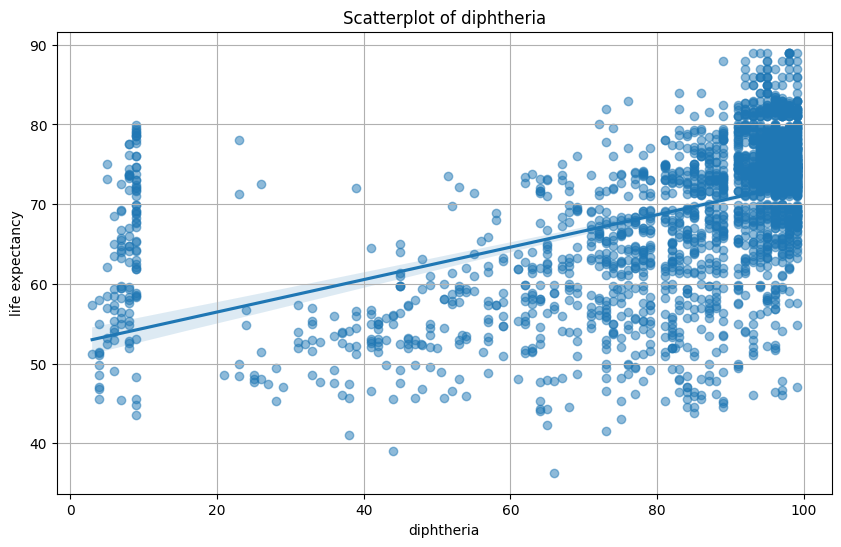

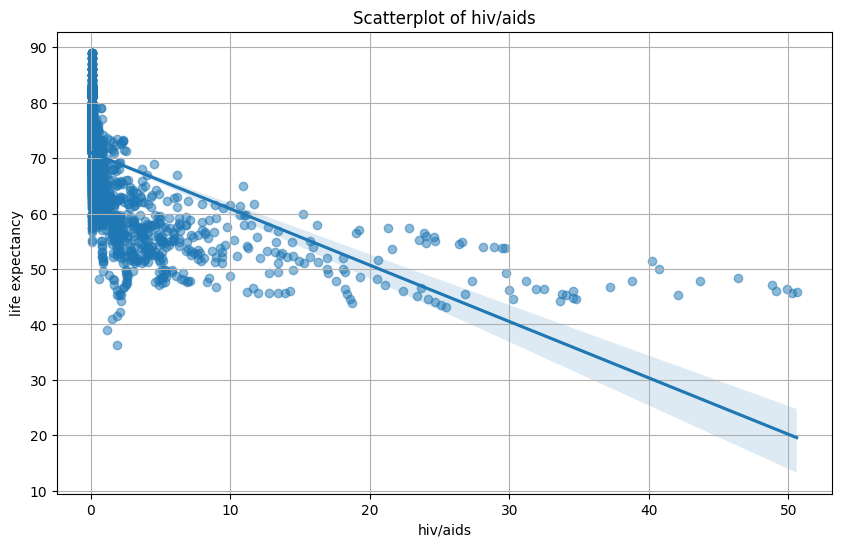

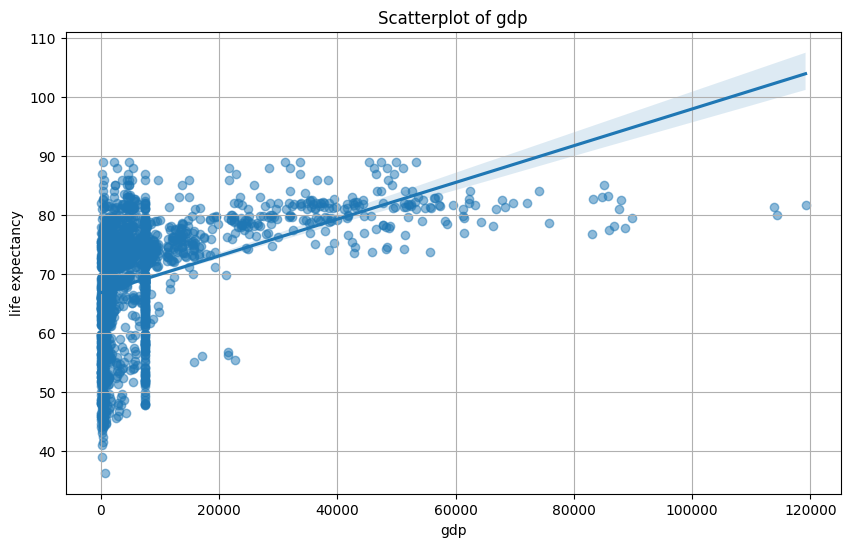

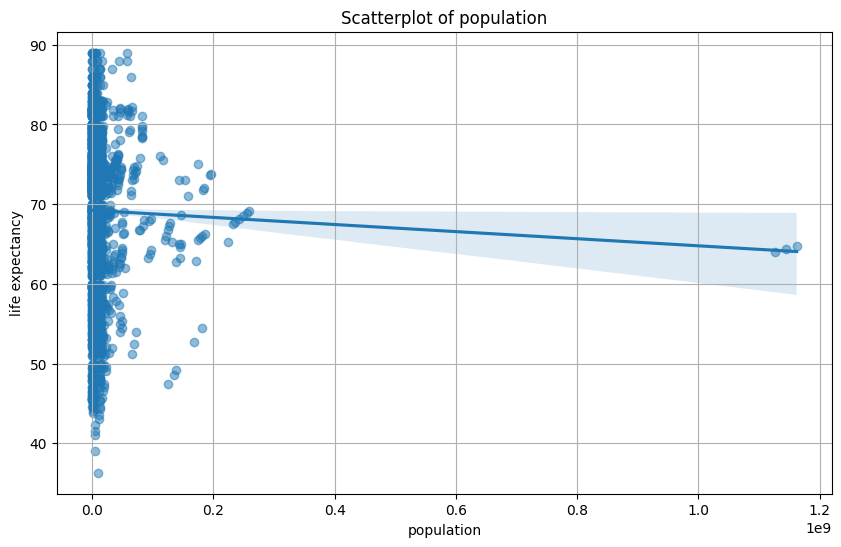

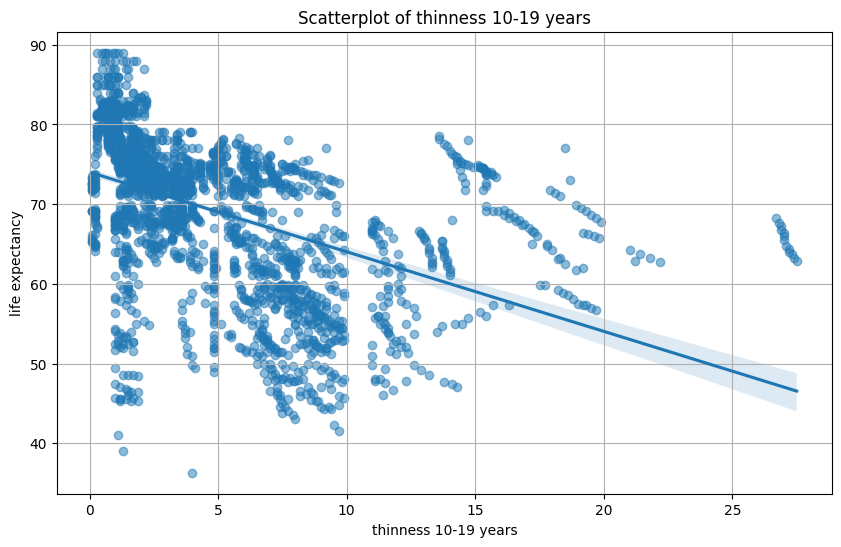

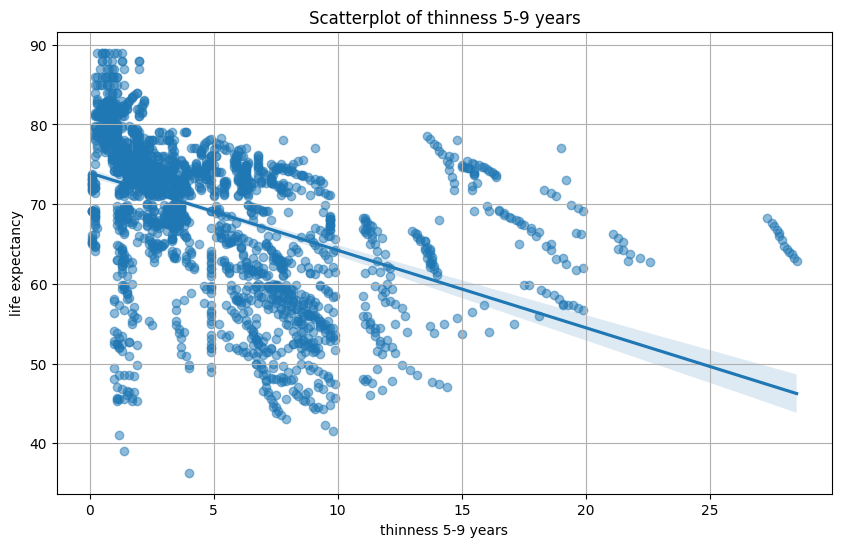

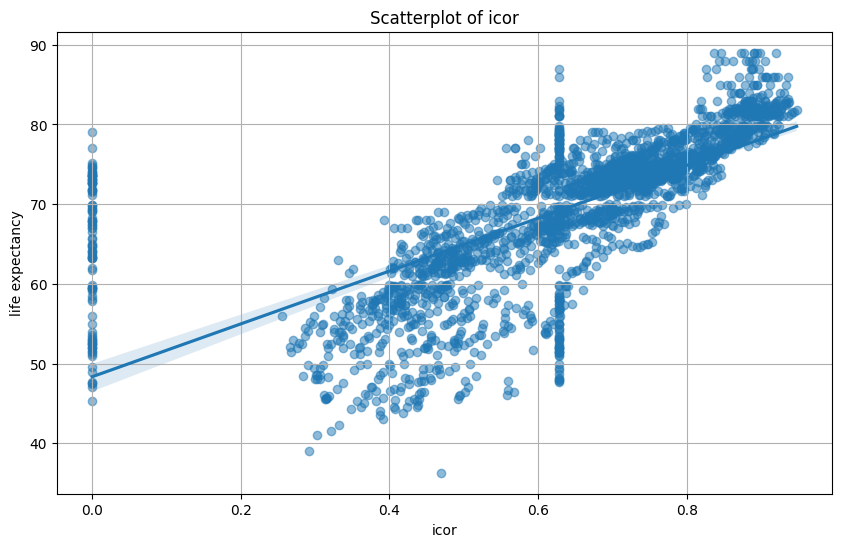

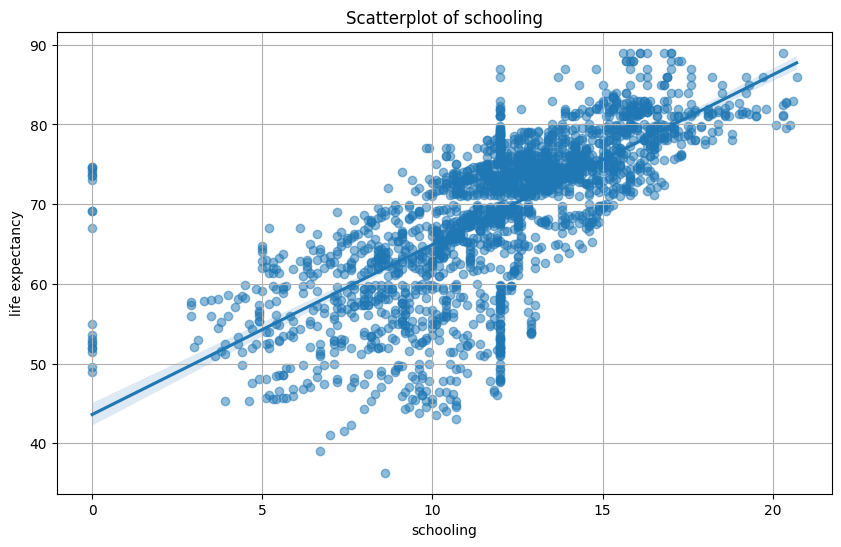

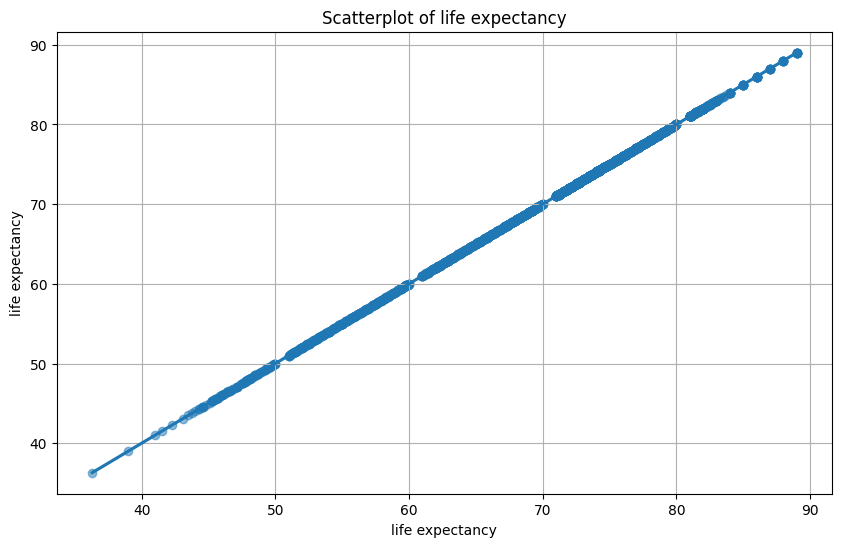

In [6]:
print("Numerical columns:", numerical_cols)

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df[col], y=df['life expectancy'], scatter_kws={'alpha':0.5})
    plt.title(f'Scatterplot of {col}')
    plt.xlabel(col)
    plt.grid()
    plt.show()

<Axes: >

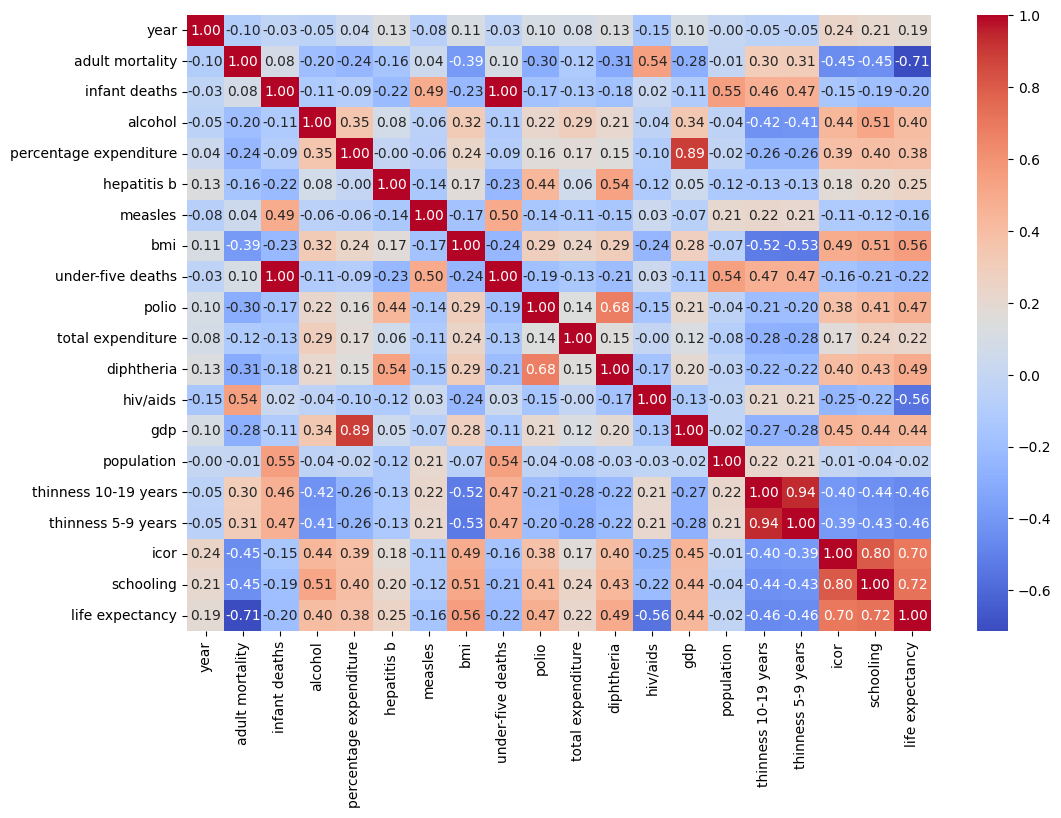

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(method='pearson'), annot=True, fmt=".2f", cmap='coolwarm')

CORRELATION OF NUMERICAL COLUMNS WITH LIFE EXPECTANCY
|Positive correlation|Negative Correlation|
|---:|:---|
|Year|Adult Mortality|
|Alcohol|Infant Deaths|
|Percentage Expenditure|Measles|
|Hepatitis|Under-5 Deaths|
|BMI|HIV/AIDS|
|Polio|Population|
|Total Expidenture|Thinness 10-19 years|
|Diphteria|Thinness 5-9 years|
|GDP||
|Icor||
|Schooling||

Based on the correlation analysis of the numerical categories, population scored the extremely low in pearson correlation (-0.02). This means population has weak linear relationship with life expectancy. For simplicity we can choose to drop population. Infant deaths and under-five deaths are also highly related, icor and schooling, as well as gpd and percentage expidenture. Thinness 5-9 and 10-19 are highly related, but we can make them one column. 

Thus for the numerical columns we will drop:

population

Infant deaths

icor

percentage expidenture


In [8]:
df["thinness"] = df[["thinness 10-19 years", "thinness 5-9 years"]].mean(axis=1)

CATEGORICAL DATA

In [9]:
for col in categorical_cols:
    model = ols(f'Q("life expectancy") ~ C(Q("{col}"))', data=df).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    p_value = anova.iloc[:, 3][0]
    print(f'ANOVA p-value for {col}: {p_value}')

ANOVA p-value for country: 0.0
ANOVA p-value for status: 1.6794386411620517e-136


A p-value of approximately 0 or very close to zero means that feature has high predictive power.
Both country and status strongly affect life expectancy.
We can also choose to drop status as it is already implied by the country.

CATEGORIES TO DROP:

population

status

In [10]:
drop_columns = ["population", "infant deaths", "icor", "percentage expenditure", "population", "status"]

In [11]:
%store drop_columns

Stored 'drop_columns' (list)
